In [1]:
import imageio
import numpy as np
import scipy.ndimage as img
import matplotlib.pyplot as plt

In [2]:
def imageRead(imgname, pilmode='L', arrtype=float):
    """
    read an image file into a numpy array
    
    imgname: str
        name of image file to be read
    pilmode: str
        for luminance / intesity images use ’L’
        for RGB color images use ’RGB’
    arrtype: numpy dtype
        use np.float, np.uint8, ...
    """
    return imageio.imread(imgname, pilmode=pilmode).astype(arrtype)

def imageWrite(arrF, imgname, arrtype=np.uint8):
    """
    write a numpy array as an image file
    the file type is inferred from the suffix of parameter imgname, e.g. ’.png’
    
    arrF: array_like
        array to be written
    imgname: str
        name of image file to be written
    arrtype: numpy dtype
        use np.uint8, ...
    """
    imageio.imwrite(imgname, arrF.astype(arrtype))

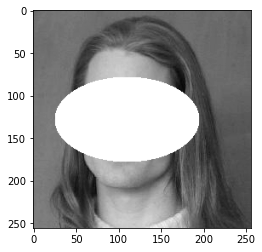

In [10]:
arrF = imageRead('Data/portrait.png')

xx, yy = np.meshgrid(range(arrF.shape[0]), range(arrF.shape[1]), indexing='ij')

arrF[((xx - 128) / 50)**2 + ((yy - 110) / 85)**2 < 1] = 255

plt.imshow(arrF, cmap='gray')
plt.imsave('Figures/t6.png', arrF, cmap='gray')
plt.show()

In [37]:
def cutout_circles(arrF, radius):
    xx, yy = np.meshgrid(range(arrF.shape[0]), range(arrF.shape[1]), indexing='ij')

    arrG = np.where((xx % (radius * 2) - radius)**2 + (yy % (radius * 2) - radius)**2 < radius**2, arrF, 255)

    return arrG

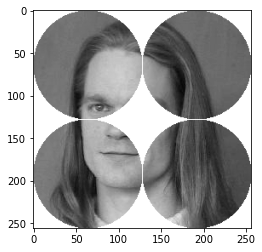

In [48]:
arrF = imageRead('Data/portrait.png')

arrG = cutout_circles(arrF, 64)

plt.imshow(arrG, cmap='gray')
#plt.imsave('Figures/t7-64.png', arrF, cmap='gray')
plt.show()

In [50]:
import timeit, functools

In [53]:
nRep = 3
nRun = 100
ts = timeit.Timer(functools.partial(cutout_circles, arrF, 64)).repeat(nRep, nRun)
print (min(ts) / nRun)

0.0031547239299834474
